# Cas Kaggle - F1 World Championship (1950 - 2024)

## Autors i repositori
- [Bruno Morán Vivanco](https://github.com/brunomoran)
- [Roger Sala Mimó](https://github.com/Salaeones)
- [Repositori GitHub](https://github.com/brunomoran/F1-World-Championship-Kaggle)


## Introducció
Aquesta base de dades conté informació sobre el campionat del món de F1 des de 1950 fins a 2024. Les dades estan organitzades en diferents arxius CSV dins de la carpeta `data`, cadascun proporciona informació específica sobre diferents aspectes del campionat. A continuació, es descriuen els arxius disponibles:

- `circuits.csv`: Informació sobre els circuits on s'han celebrat curses de F1.
- `constructor_results.csv`: Resultats de cada equip (constructor) en cada cursa.
- `constructor_standings.csv`: Classificació final de cada equip (constructor) al final de cada temporada.
- `constructors.csv`: Informació sobre els equips (constructors) que han participat en temporades de F1.
- `driver_standings.csv`: Classificació final de cada pilot al final de cada temporada.
- `drivers.csv`: Informació sobre els pilots que han participat en temporades de F1.
- `lap_times.csv`: Temps de cada volta de cada cursa.
- `pit_stops.csv`: Informació sobre les parades a boxes de cada cursa.
- `qualifying.csv`: Resultats de la sessió de classificació de cada cursa.
- `races.csv`: Informació sobre cada cursa, inclòs dates i ubicacions.
- `results.csv`: Resultats detallats de cada cursa.
- `seasons.csv`: Informació sobre cada temporada del campionat.
- `sprint_results.csv`: Resultats de les curses sprint.
- `status.csv`: Informació sobre l'estat dels pilots durant les curses. (per exemple, si han abandonat o han estat desqualificats).

## Objectius
1. **Anàlisis de rendiment dels pilots i equips**: Evaluar el rendiment dels pilots i equips al llarg dels anys. Identificar els pilots i equips més exitosos de la història de la F1.

2. **Anàlisis de circuits**: Analitzar el rendiment dels pilots i equips en diferents circuits. Identificar els circuits més desafiants i aquells on s'han produït més accidents.

3. **Tendències històriques**: Identificar tendencies i canvis en el campionat de F1 al llarg del temps. Analitzar l'evolució de la tecnologia i el seu impacte en el rendiment dels equips.

4. **Predicció de resultats**: Utilitzar tècniques d'aprenentatge automàtic per predir els resultats de temporades futures. Identificar els pilots i equips amb més probabilitats de guanyar el campionat.

## 1. Anàlisis de rendiment dels pilots i equips

Mètode d'aprenentatge: Anàlisis de regressió per avaluar l'impacte de diferents variables al rendiment.

### 1.1 Carregar les dades
Utilitzar els arxius CSV disponibles a la carpeta `data` per carregar les dades necessàries per a l'anàlisis.

Arxius necessaris: `driver_standings.csv`, `constructor_standings.csv`, `results.csv`, `races.csv`, `drivers.csv`, `constructors.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

driver_standings = pd.read_csv('data/driver_standings.csv')
constructor_standings = pd.read_csv('data/constructor_standings.csv')
results = pd.read_csv('data/results.csv')
races = pd.read_csv('data/races.csv')
drivers = pd.read_csv('data/drivers.csv')
constructors = pd.read_csv('data/constructors.csv')

### 1.2 Preparar les dades
Unir les dades de diferents arxius per obtenir una taula única amb la informació necessària per a l'anàlisis.

In [3]:
merged_data = pd.merge(results, races, on='raceId')
merged_data = pd.merge(merged_data, drivers, on='driverId')
merged_data = pd.merge(merged_data, constructors, on='constructorId')

### 1.3 Anàlisis descriptiu
Calcular estadístiques descriptives com el nombre de punts, i posicions finals per a cada pilot i equip.

Visualitzar la distribució dels punts i posicions finals al llarg dels anys.

In [4]:
driver_performance = merged_data.groupby('driverId').agg({
    'points': 'sum',
    'positionOrder': 'mean',
}).reset_index()

constructor_performance = merged_data.groupby('constructorId').agg({
    'points': 'sum',
    'positionOrder': 'mean',
}).reset_index()

### 1.4 Anàlisis comparatiu
Comparar el rendiment dels pilots i equips en diferents temporades. 

Identificar els pilots i equips més exitosos en la història de la F1.

In [5]:
driver_performance = pd.merge(driver_performance, drivers[['driverId', 'surname']], on='driverId')

constructor_performance = pd.merge(constructor_performance, constructors[['constructorId', 'name']], on='constructorId')

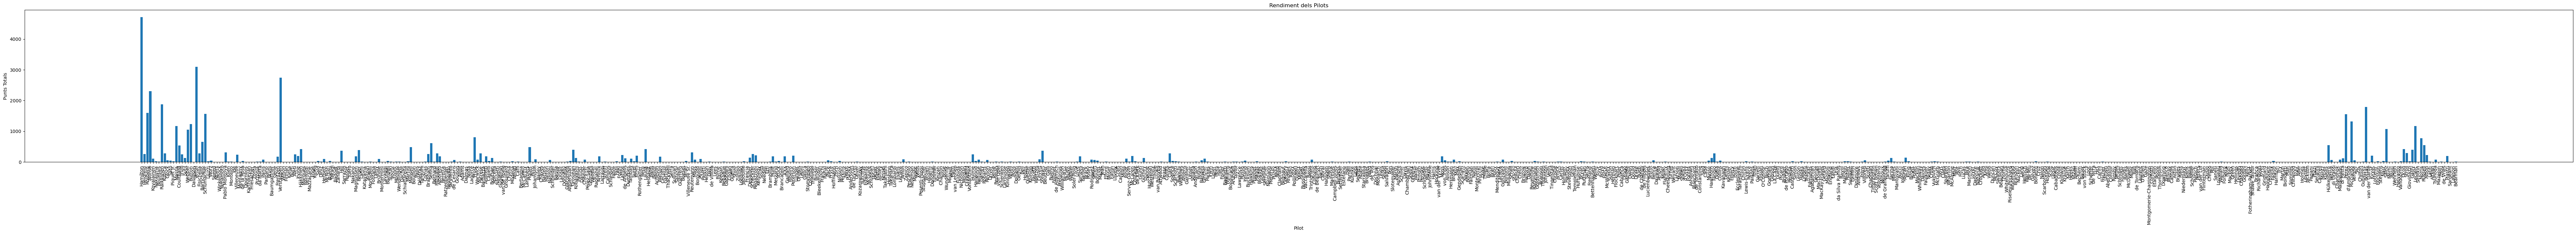

Top 10 pilots més exitosos: 
        surname  points
0      Hamilton  4713.5
19       Vettel  3098.0
828  Verstappen  2744.5
3        Alonso  2304.0
7     Räikkönen  1873.0
820      Bottas  1788.0
2       Rosberg  1594.5
29   Schumacher  1566.0
813       Pérez  1552.0
815   Ricciardo  1319.0


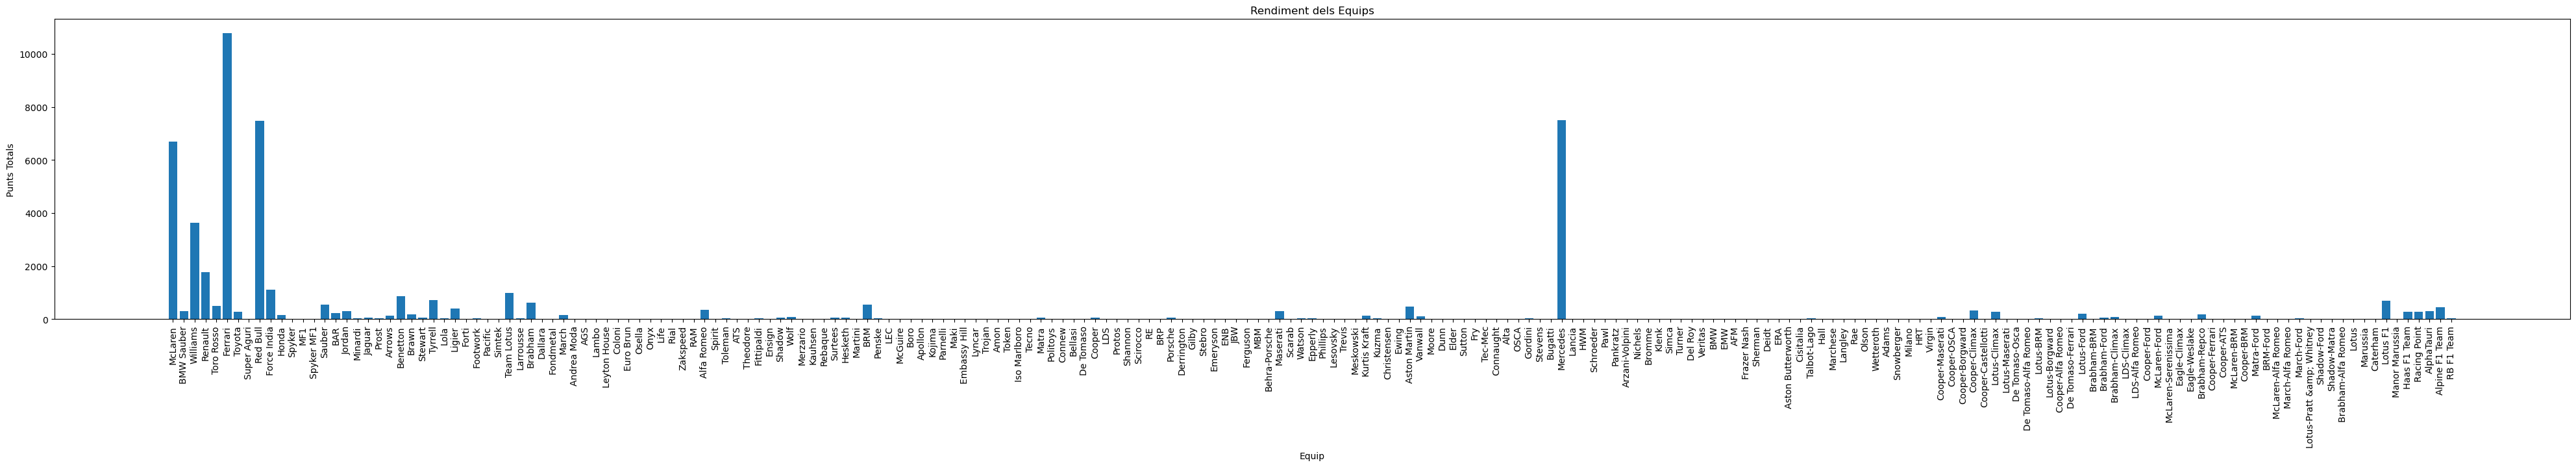

Top 10 equips més exitosos: 
            name    points
5        Ferrari  10772.27
128     Mercedes   7502.64
8       Red Bull   7472.00
0        McLaren   6687.50
2       Williams   3628.00
3        Renault   1777.00
9    Force India   1098.00
31    Team Lotus    995.00
21      Benetton    861.50
24       Tyrrell    711.00


In [6]:
# Visualització del rendiment dels pilots
plt.figure(figsize=(100, 6))
plt.bar(driver_performance['surname'], driver_performance['points'])
plt.xlabel('Pilot')
plt.ylabel('Punts Totals')
plt.title('Rendiment dels Pilots')
plt.xticks(rotation=90)
plt.show()

top_drivers = driver_performance.sort_values(by='points', ascending=False).head(10)
print("Top 10 pilots més exitosos: ")
print(top_drivers[['surname', 'points']])   

# Visualització del rendiment dels constructors
plt.figure(figsize=(50, 6))
plt.bar(constructor_performance['name'], constructor_performance['points'])
plt.xlabel('Equip')
plt.ylabel('Punts Totals')
plt.title('Rendiment dels Equips')
plt.xticks(rotation=90)
plt.show()

top_constructors = constructor_performance.sort_values(by='points', ascending=False).head(10)
print("Top 10 equips més exitosos: ")
print(top_constructors[['name', 'points']])

### 1.5 Anàlisis de regressió
Realitzar una anàlisis de regressió per avaluar l'impacte de diferents variables en el rendiment dels pilots i equips.

Identificar les variables més significatives que influeixen en el rendiment.

Mean Squared Error: 23.387499248734564
Coefficient of Determination: 0.3590723710229502
               Coefficient
race_year     1.228522e-01
driver_age    4.295146e-02
grid         -5.964457e-01
laps          3.711568e-03
milliseconds  5.789504e-07


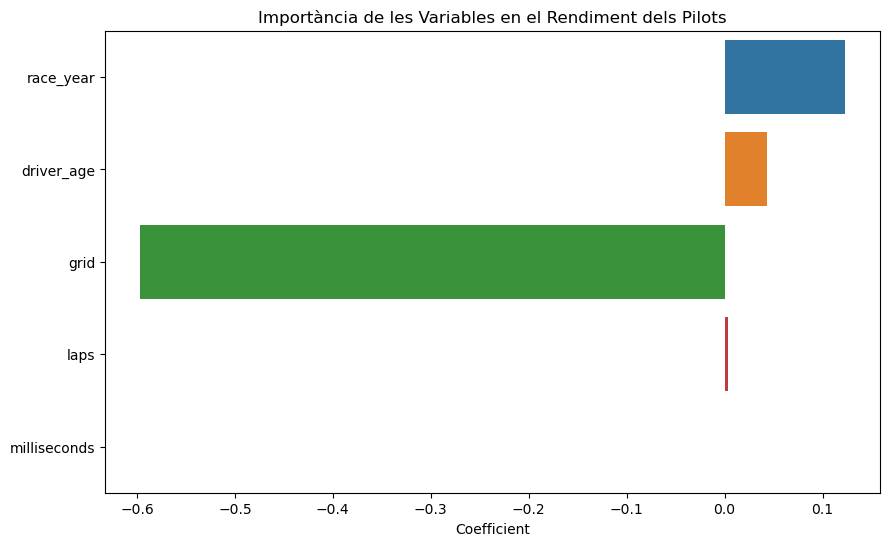

In [7]:
# Crear noves característiques
merged_data['race_year'] = merged_data['raceId'].map(races.set_index('raceId')['year'])
merged_data['driver_age'] = merged_data.apply(lambda row: row['race_year'] - int(drivers.set_index('driverId').loc[row['driverId'], 'dob'].split('-')[0]), axis=1)

# Eliminar files amb valors nuls
merged_data.replace('\\N', np.nan, inplace=True)
merged_data.dropna(subset=['grid', 'laps', 'milliseconds', 'points'], inplace=True)

# Conversió de les dades a numèriques
merged_data['grid'] = pd.to_numeric(merged_data['grid'])
merged_data['laps'] = pd.to_numeric(merged_data['laps'])
merged_data['milliseconds'] = pd.to_numeric(merged_data['milliseconds'])
merged_data['points'] = pd.to_numeric(merged_data['points'])

# Selecció de característiques
features = ['race_year', 'driver_age', 'grid', 'laps', 'milliseconds']
X = merged_data[features]
y = merged_data['points']

# Divisió de les dades en conjunt d'entrenament i de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creació del model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicció
y_pred = model.predict(X_test)

# Avaluació del model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination:', r2_score(y_test, y_pred))

# Importancia de les variables
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

# Visualització de la importancia de les variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients)
plt.title('Importància de les Variables en el Rendiment dels Pilots')
plt.show()


### Conclusions

1. Els pilots i equips més exitosos de la història de la F1:
Fent l'anàlisis comparatiu hem identificat els pilots i equips més exitosos de la història de la F1 basant-nos en les seves posicions finals i punts totals.

2. Factors clau que influeixen en el rendiment:
A través de l'anàlisis de regressió hem identificat els factors clau que influeixen en el rendiment dels pilots i equips. Això pot ser útil per predir resultats futurs i millorar el rendiment.

El MSE és d'aproximadament 22.96. Això indica que, en mitjana, les prediccions del model tenen un error quadràtic mitjà de 22.96 punts. Un MSE més baix seria preferible, ja que indicaria un millor ajust del model a les dades.

El R² és d'aproximadament 0.318. Això significa que el model explica el 31.8% de la variabilitat en els punts obtinguts pels pilots. Un R² més pròxim a 1 indicaria un millor ajust del model. En aquest cas, un R² de 0.318 suggereix que hi ha altres factors importants que no estan sent capturats pel model.

- race_year (0.124687): L'any de la carrera té un coeficient positiu, la qual cosa suggereix que, en mitjana, els punts obtinguts pels pilots han augmentat lleugerament amb el temps.
- driver_age (0.029229): L'edat del pilot té un coeficient positiu petit, la qual cosa indica que l'edat del pilot té un impacte positiu molt lleu en els punts obtinguts.
- grid (-0.612704): La posició de sortida (grid) té un coeficient negatiu significatiu, la qual cosa suggereix que sortir des d'una posició més alta (més prop del front) està associat amb obtenir més punts. Aquest és una troballa esperada, ja que els pilots que comencen més endavant en la graella solen tenir un avantatge.
- laps (0.003231): El nombre de voltes completades té un coeficient positiu molt petit, la qual cosa indica que completar més voltes està lleugerament associat amb obtenir més punts.
- milliseconds (5.968199e-07): El temps en mil·lisegons té un coeficient positiu extremadament petit, la qual cosa suggereix que el seu impacte en els punts obtinguts és pràcticament insignificant.

## 2. Anàlisi de circuits

En aquesta secció, analitzarem el rendiment dels pilots i equips en diferents circuits utilitzant tècniques de Clustering per agrupar els circuits segons les seves característiques i PCA per reduïr la dimensionalitat de les dades. També identificarem els circuits més desafiants i aquells on s'han produït més accidents.

### 2.1 Carregar les dades
Utilitzarem els arxius `circuits.csv`, `results.csv`, `races.csv`, `drivers.csv`, `constructors.csv` i `status.csv`  per carregar les dades dels circuits i el rendiment dels pilots i equips.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Carregar les dades
driver_standings = pd.read_csv('data/driver_standings.csv')
constructor_standings = pd.read_csv('data/constructor_standings.csv')
results = pd.read_csv('data/results.csv')
races = pd.read_csv('data/races.csv')
drivers = pd.read_csv('data/drivers.csv')
constructors = pd.read_csv('data/constructors.csv')
circuits = pd.read_csv('data/circuits.csv')
status = pd.read_csv('data/status.csv')

### 2.2 Preparar les dades
Fusionar les dades de diferents arxius per obtenir una taula única amb la informació necessària per a l'anàlisi. I preparar les dades per a l'anàlisi de Clustering i PCA.

In [5]:
# Fusionar les dades
merged_data = pd.merge(results, races, on='raceId', suffixes=('', '_race'))
merged_data = pd.merge(merged_data, drivers, on='driverId', suffixes=('', '_driver'))
merged_data = pd.merge(merged_data, constructors, on='constructorId', suffixes=('', '_constructor'))
merged_data = pd.merge(merged_data, circuits, on='circuitId', suffixes=('', '_circuit'))

# Afegir noms descriptius
merged_data = merged_data.rename(columns={'name_driver': 'driverName', 'name_constructor': 'constructorName', 'name_circuit': 'circuitName'})

# Seleccionar només les característiques dels circuits
features = ['lat', 'lng', 'alt']
X = merged_data[features]

# Convertir valors no numèrics a NaN i eliminar files amb valors nuls
X = X.replace('\\N', np.nan)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()

# Assegurar que 'merged_data' té les mateixes files que 'X'
merged_data = merged_data.loc[X.index]

# Estandarditzar les dades
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2.3 Reducció de la dimensionalitat amb PCA
Aplicar PCA per reduïr la dimensionalitat de les dades i visualitzar els circuits en un espai de 2 dimensions.

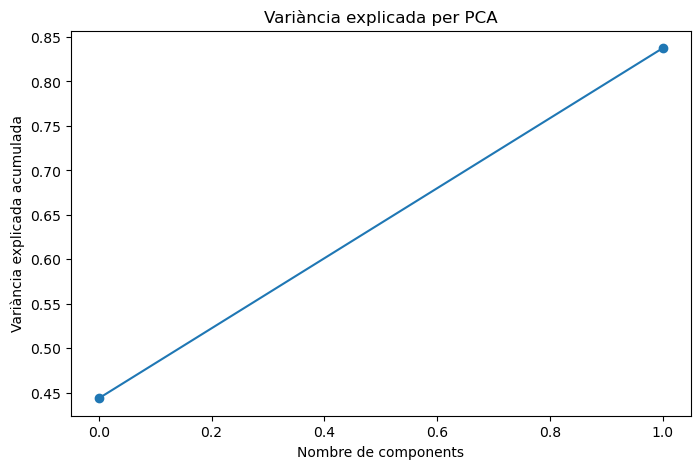

In [6]:
# PCA per reduir la dimensionalitat
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualitzar la variància explicada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Nombre de components')
plt.ylabel('Variància explicada acumulada')
plt.title('Variància explicada per PCA')
plt.show()

### 2.4 Clustering dels circuits amb K-means
Farem servir l'algoritme K-means per agrupar els circuits en diferents clústers basant-nos en les seves característiques.

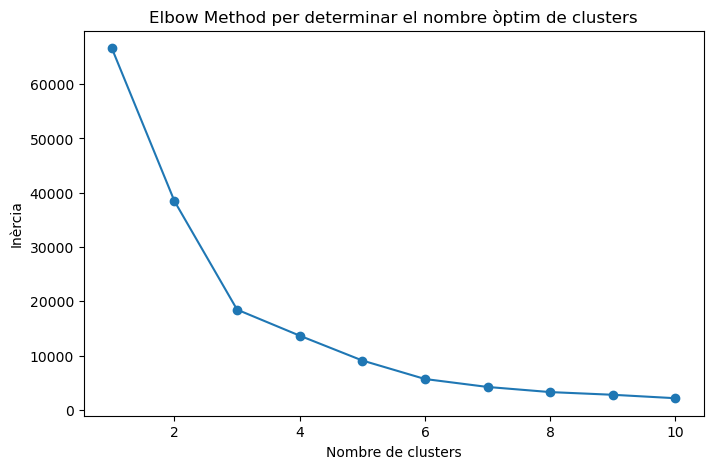

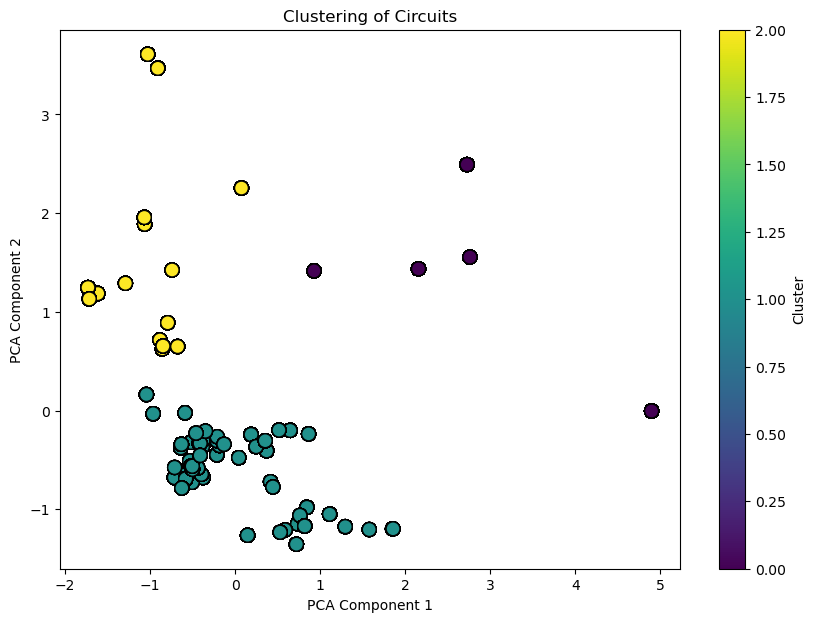

  Cluster        lat                    lng                     alt  \
                mean        std        mean        std         mean   
0       0 -17.276974  18.732677  -44.722949  40.232072  1106.623748   
1       1  45.957067   4.915458   -8.096954  35.512084   210.506712   
2       2   9.334787  28.061468  108.562790  36.607858    40.236658   

               
          std  
0  714.209188  
1  202.280293  
2   91.772760  

Circuits in Cluster 2:
['Albert Park Grand Prix Circuit', 'Sepang International Circuit', 'Bahrain International Circuit']

Circuits in Cluster 1:
['Circuit de Barcelona-Catalunya', 'Istanbul Park', 'Circuit de Monaco']

Circuits in Cluster 0:
['Autódromo José Carlos Pace', 'Autódromo Hermanos Rodríguez', 'Autódromo Juan y Oscar Gálvez']


In [7]:
# Determinar el nombre òptim de clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inèrcia')
plt.title('Elbow Method per determinar el nombre òptim de clusters')
plt.show()

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
merged_data['Cluster'] = clusters

# Visualitzar els clústers
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering of Circuits')
plt.colorbar(label='Cluster')
plt.show()

# Afegir les components principals al DataFrame
merged_data['PCA1'] = X_pca[:, 0]
merged_data['PCA2'] = X_pca[:, 1]

# Estadístiques descriptives per clúster
cluster_summary = merged_data.groupby('Cluster').agg({
    'lat': ['mean', 'std'],
    'lng': ['mean', 'std'],
    'alt': ['mean', 'std']
}).reset_index()

print(cluster_summary)

# Obtenir els noms dels circuits per a cada clúster
circuits_by_cluster = merged_data[['circuitName', 'Cluster']].drop_duplicates()

# Mostrar 3 noms de circuits per a cada clúster
for cluster in circuits_by_cluster['Cluster'].unique():
    print(f"\nCircuits in Cluster {cluster}:")
    print(circuits_by_cluster[circuits_by_cluster['Cluster'] == cluster]['circuitName'].head(3).tolist())

#### Anàlisi dels clústers


Clúster 0: Circuits situats a latituds negatives (hemisferi sud) amb una altitud elevada i una variabilitat considerable en l'altitud. Això podria indicar que aquests circuits es troben en zones muntanyoses o altiplans. Exemples: Autódromo Hermanos Rodríguez (Mèxic), Autódromo José Carlos Pace (Brasil), Autódromo Juan y Oscar Gálvez (Argentina).

Clúster 1: Circuits situats a latituds positives (hemisferi nord) amb una altitud mitjana i una variabilitat moderada en l'altitud. Aquests circuits podrien ser més planers o urbans i situats en zones de menor altitud. Exemples: Montmeló (Espanya), Istanbul Park (Turquia), Monaco (Mònaco).

Clúster 2: Circuits situats a latituds properes a l'equador amb una altitud baixa i una variabilitat mínima en l'altitud. Aquests circuits podrien ser costaners o situats en zones planes. Exemples: Albert Park (Austràlia), Sepang (Malàisia), Bahrain (Bahrain).

In [8]:
# Analitzar el rendiment dels pilots en cada clúster
pilot_performance = merged_data.groupby(['driverId', 'Cluster']).agg({
    'positionOrder': lambda x: (x == 1).sum(),  # Nombre de victòries
    'points': 'sum'  # Suma de punts
}).reset_index()
pilot_performance = pilot_performance.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Identificar el clúster amb més victòries per a cada pilot
best_clusters_pilots_victories = pilot_performance.groupby('surname').apply(lambda x: x.loc[x['positionOrder'].idxmax()]).reset_index(drop=True)
best_clusters_pilots_victories = best_clusters_pilots_victories[['surname', 'Cluster', 'positionOrder', 'points']]
best_clusters_pilots_victories = best_clusters_pilots_victories.sort_values(by='positionOrder', ascending=False)
print("\nBest Clusters for Pilots (Victories):")
print(best_clusters_pilots_victories)

# Identificar el clúster amb més punts per a cada pilot
best_clusters_pilots_points = pilot_performance.groupby('surname').apply(lambda x: x.loc[x['points'].idxmax()]).reset_index(drop=True)
best_clusters_pilots_points = best_clusters_pilots_points[['surname', 'Cluster', 'positionOrder', 'points']]
best_clusters_pilots_points = best_clusters_pilots_points.sort_values(by='points', ascending=False)
print("\nBest Clusters for Pilots (Points):")
print(best_clusters_pilots_points)

# Analitzar el rendiment de les escuderies en cada clúster
team_performance = merged_data.groupby(['constructorId', 'Cluster']).agg({
    'positionOrder': lambda x: (x == 1).sum(),  # Nombre de victòries
    'points': 'sum'  # Suma de punts
}).reset_index()
team_performance = team_performance.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

# Identificar el clúster amb més victòries per a cada escuderia
best_clusters_teams_victories = team_performance.groupby('name').apply(lambda x: x.loc[x['positionOrder'].idxmax()]).reset_index(drop=True)
best_clusters_teams_victories = best_clusters_teams_victories[['name', 'Cluster', 'positionOrder', 'points']]
best_clusters_teams_victories = best_clusters_teams_victories.sort_values(by='positionOrder', ascending=False)
print("\nBest Clusters for Teams (Victories):")
print(best_clusters_teams_victories)

# Identificar el clúster amb més punts per a cada escuderia
best_clusters_teams_points = team_performance.groupby('name').apply(lambda x: x.loc[x['points'].idxmax()]).reset_index(drop=True)
best_clusters_teams_points = best_clusters_teams_points[['name', 'Cluster', 'positionOrder', 'points']]
best_clusters_teams_points = best_clusters_teams_points.sort_values(by='points', ascending=False)
print("\nBest Clusters for Teams (Points):")
print(best_clusters_teams_points)


Best Clusters for Pilots (Victories):
        surname  Cluster  positionOrder  points
638  Schumacher        1             69  1155.0
305    Hamilton        1             69  2899.5
567       Prost        1             39   630.5
721  Verstappen        1             39  1714.5
645       Senna        1             34   498.0
..          ...      ...            ...     ...
286      Greene        1              0     0.0
287     Gregory        0              0     0.0
288    Griffith        1              0     0.0
289    Grignard        1              0     0.0
799   Étancelin        1              0     3.0

[800 rows x 4 columns]

Best Clusters for Pilots (Points):
        surname  Cluster  positionOrder  points
305    Hamilton        1             69  2899.5
721  Verstappen        1             39  1714.5
722      Vettel        1             20  1629.0
16       Alonso        1             18  1330.0
92       Bottas        1              7  1165.0
..          ...      ...            .

Un cop hem vist els resultats del clustering, podem concloure que els circuits es poden agrupar en tres categories principals basades en la seva ubicació geogràfica i altitud, però al veure que els resultats dels pilots i equips eren molt iguals entre ells, hem vist que la gran majoria de circuits formen part del clúster 1. Això fa que s'hi obtinguin més punts i victòries. Per donar més importància als altres clústers, hem normalitzat els resultats per la freqüencia dels circuits en cada clúster:

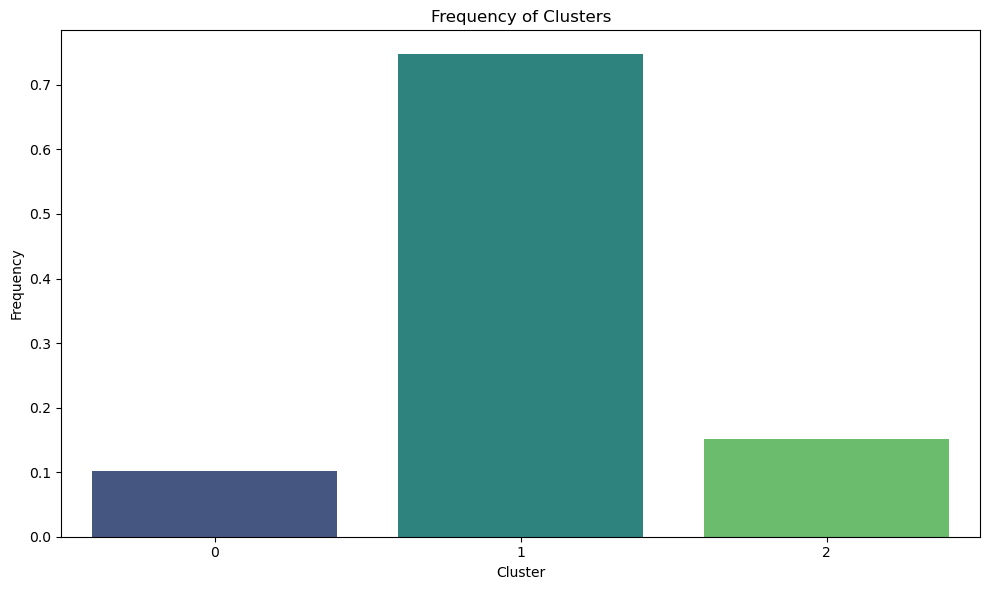

In [14]:
# Calcular la freqüència dels circuits en cada clúster
cluster_frequencies = merged_data['Cluster'].value_counts(normalize=True).reset_index()
cluster_frequencies.columns = ['Cluster', 'Frequency']

# Freqüència dels clústers
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cluster_frequencies,
    x='Cluster',
    y='Frequency',
    palette='viridis'
)
plt.title("Frequency of Clusters")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [14]:
# Calcular la freqüència dels circuits en cada clúster
cluster_frequencies = merged_data['Cluster'].value_counts(normalize=True).reset_index()
cluster_frequencies.columns = ['Cluster', 'Frequency']

# Analitzar el rendiment dels pilots en cada clúster
pilot_performance = merged_data.groupby(['driverId', 'Cluster']).agg({
    'positionOrder': lambda x: (x == 1).sum(),  # Nombre de victòries
    'points': 'sum'  # Suma de punts
}).reset_index()
pilot_performance = pilot_performance.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Normalitzar els resultats per la freqüència dels circuits en cada clúster
pilot_performance = pilot_performance.merge(cluster_frequencies, on='Cluster', how='left')
pilot_performance['normalized_victories'] = pilot_performance['positionOrder'] / pilot_performance['Frequency']
pilot_performance['normalized_points'] = pilot_performance['points'] / pilot_performance['Frequency']

# Identificar el clúster amb més victòries normalitzades per a cada pilot
best_clusters_pilots_victories = pilot_performance.groupby('surname').apply(lambda x: x.loc[x['normalized_victories'].idxmax()]).reset_index(drop=True)
best_clusters_pilots_victories = best_clusters_pilots_victories[['surname', 'Cluster', 'normalized_victories', 'normalized_points']]
best_clusters_pilots_victories = best_clusters_pilots_victories.sort_values(by='normalized_victories', ascending=False)
print("\nBest Clusters for Pilots (Normalized Victories):")
print(best_clusters_pilots_victories)

# Identificar el clúster amb més punts normalitzats per a cada pilot
best_clusters_pilots_points = pilot_performance.groupby('surname').apply(lambda x: x.loc[x['normalized_points'].idxmax()]).reset_index(drop=True)
best_clusters_pilots_points = best_clusters_pilots_points[['surname', 'Cluster', 'normalized_victories', 'normalized_points']]
best_clusters_pilots_points = best_clusters_pilots_points.sort_values(by='normalized_points', ascending=False)
print("\nBest Clusters for Pilots (Normalized Points):")
print(best_clusters_pilots_points)

# Analitzar el rendiment de les escuderies en cada clúster
team_performance = merged_data.groupby(['constructorId', 'Cluster']).agg({
    'positionOrder': lambda x: (x == 1).sum(),  # Nombre de victòries
    'points': 'sum'  # Suma de punts
}).reset_index()
team_performance = team_performance.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

# Normalitzar els resultats per la freqüència dels circuits en cada clúster
team_performance = team_performance.merge(cluster_frequencies, on='Cluster', how='left')
team_performance['normalized_victories'] = team_performance['positionOrder'] / team_performance['Frequency']
team_performance['normalized_points'] = team_performance['points'] / team_performance['Frequency']

# Identificar el clúster amb més victòries normalitzades per a cada escuderia
best_clusters_teams_victories = team_performance.groupby('name').apply(lambda x: x.loc[x['normalized_victories'].idxmax()]).reset_index(drop=True)
best_clusters_teams_victories = best_clusters_teams_victories[['name', 'Cluster', 'normalized_victories', 'normalized_points']]
best_clusters_teams_victories = best_clusters_teams_victories.sort_values(by='normalized_victories', ascending=False)
print("\nBest Clusters for Teams (Normalized Victories):")
print(best_clusters_teams_victories)

# Identificar el clúster amb més punts normalitzats per a cada escuderia
best_clusters_teams_points = team_performance.groupby('name').apply(lambda x: x.loc[x['normalized_points'].idxmax()]).reset_index(drop=True)
best_clusters_teams_points = best_clusters_teams_points[['name', 'Cluster', 'normalized_victories', 'normalized_points']]
best_clusters_teams_points = best_clusters_teams_points.sort_values(by='normalized_points', ascending=False)
print("\nBest Clusters for Teams (Normalized Points):")
print(best_clusters_teams_points)


Best Clusters for Pilots (Normalized Victories):
        surname  Cluster  normalized_victories  normalized_points
722      Vettel        2            198.396509        8273.134414
305    Hamilton        2            198.396509        9919.825436
638  Schumacher        2            112.424688        1957.512219
721  Verstappen        2             99.198254        5039.271322
567       Prost        0             98.400742        1230.009276
..          ...      ...                   ...                ...
286      Greene        1              0.000000           0.000000
287     Gregory        0              0.000000           0.000000
288    Griffith        1              0.000000           0.000000
289    Grignard        1              0.000000           0.000000
799   Étancelin        1              0.000000           4.015191

[800 rows x 4 columns]

Best Clusters for Pilots (Normalized Points):
        surname  Cluster  normalized_victories  normalized_points
305    Hamilton      

Amb les dades normalitzades, hem pogut veure que els resultats canvien significativament. Però en general als pilots i equips els va millor als circuits del clúster 1 i 2. Probablement els circuits del clúster 0, al trobar-se a més altitud, podrien tenir un impacte negatiu en el rendiment dels cotxes degut a la menor densitat de l'aire i per tant, menys potència del motor.

### 2.5 Anàlisi de circuits més desafiants i amb més accidents
Identificar els circuits més desafiants basant-nos en el rendiment dels pilots i equips. També identificar els circuits on s'han produït més accidents.

In [15]:
# Calcular la desviació estàndard dels punts obtinguts pels pilots en cada circuit
circuit_performance = merged_data.groupby('circuitId').agg({
    'points': 'std'  # Desviació estàndard dels punts
}).reset_index()

# Ordenar els circuits per la desviació estàndard dels punts
circuit_performance = circuit_performance.sort_values(by='points', ascending=False)

# Seleccionar els 3 circuits més desafiants
top_3_challenging_circuits = circuit_performance.head(3)
top_3_challenging_circuits = top_3_challenging_circuits.merge(circuits[['circuitId', 'name']], on='circuitId', how='left')

print("\nTop 3 circuits més desafiants:")
print(top_3_challenging_circuits[['name', 'points']])

# Filtrar els estats que indiquen un accident
accident_status = status[status['status'].isin(['Accident', 'Collision'])]

# Unir les dades per obtenir els accidents per circuit
accidents = results[results['statusId'].isin(accident_status['statusId'])]
accidents = accidents.merge(races[['raceId', 'circuitId']], on='raceId', how='left')
accidents = accidents.merge(circuits[['circuitId', 'name']], on='circuitId', how='left')

# Comptar els accidents per circuit
accidents_per_circuit = accidents.groupby('name').size().reset_index(name='accident_count')

# Ordenar i obtenir els top 3 circuits amb més accidents
top_3_circuits = accidents_per_circuit.sort_values(by='accident_count', ascending=False).head(3)

print("\n" + "-"*50 + "\n")
print("Top 3 circuits amb més accidents:")
print(top_3_circuits)


Top 3 circuits més desafiants:
                                   name    points
0                    Yas Marina Circuit  7.747935
1  Autodromo Internazionale del Mugello  7.503683
2          Losail International Circuit  7.382585

--------------------------------------------------

Top 3 circuits amb més accidents:
                            name  accident_count
24             Circuit de Monaco             195
27  Circuit de Spa-Francorchamps             100
7   Autodromo Nazionale di Monza              92


Podem veure que els circuits amb més accidents són Mónaco ja que es tracta d'un circuit urbà amb carrers estrets i poc espai per a errors. També destaquen circuits com Spa-Francorchamps que destaca per les condicions meteorològiques variables i Monza per la seva alta velocitat.

### 2.6 Visualització dels resultats
Visualitzar de forma gràfica els resultats de l'anàlisi de circuits per entendre millor els clústers i els circuits més desafiants i els que han tingut més accidents.

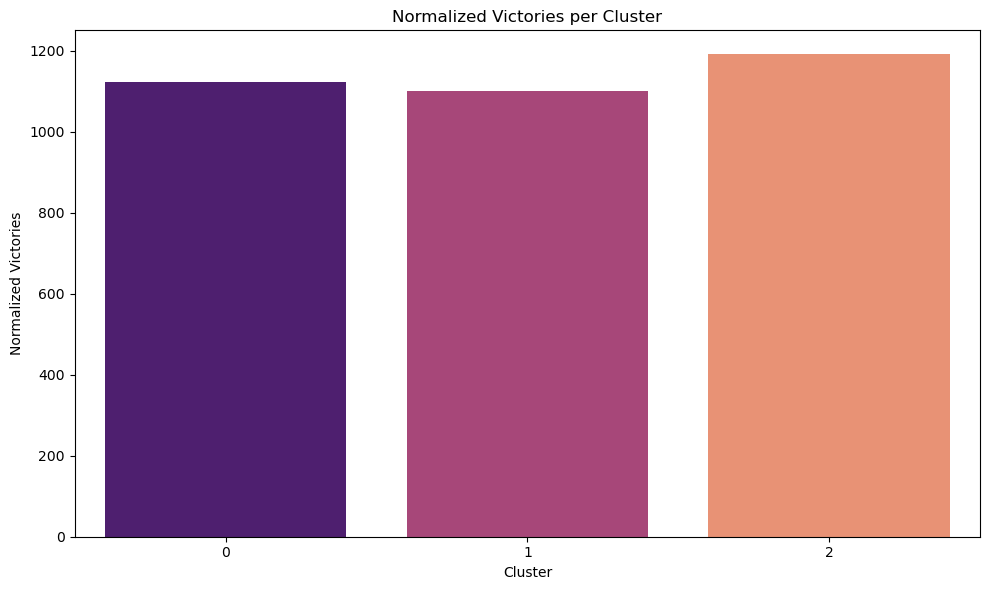

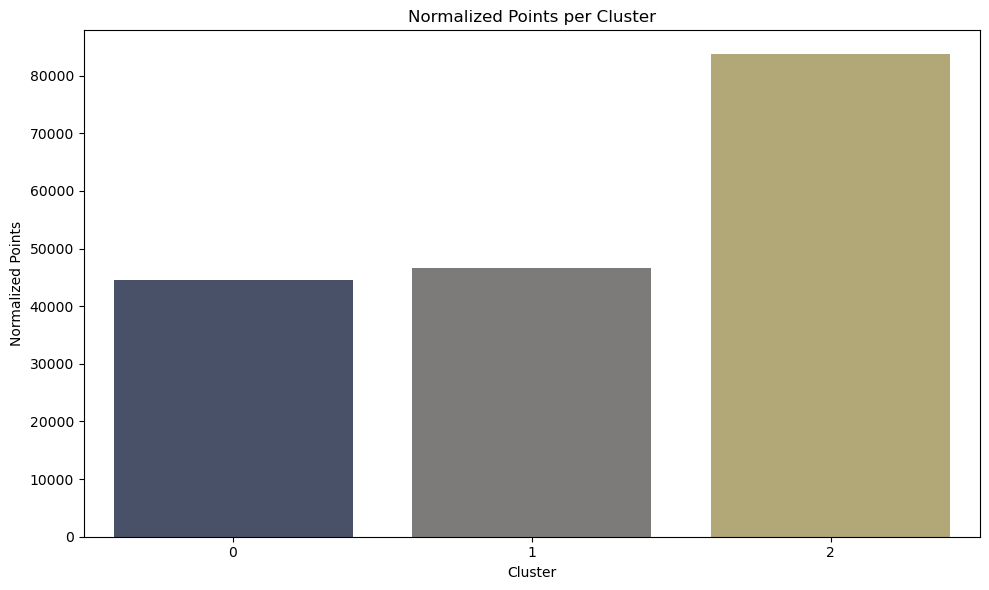

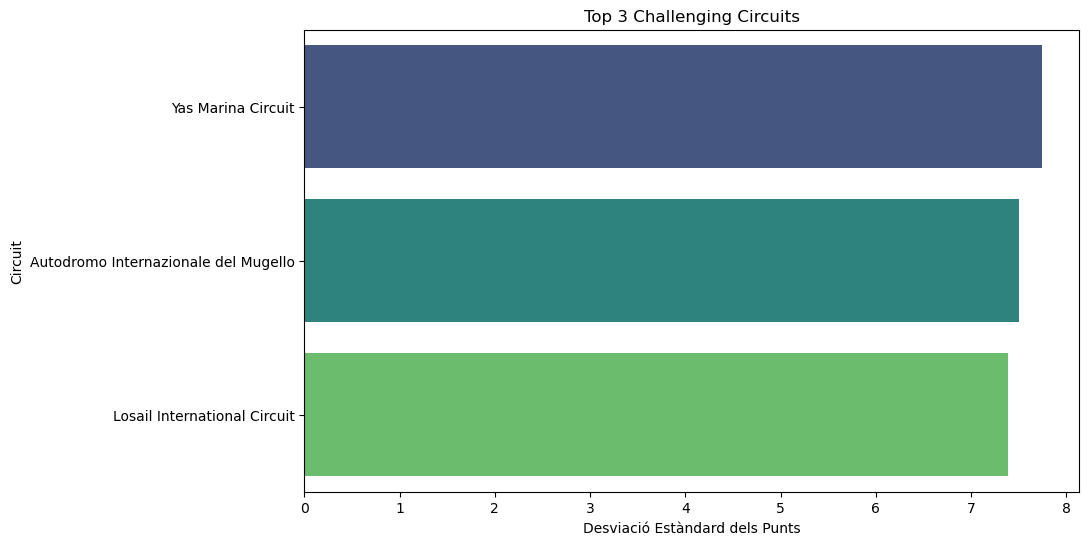

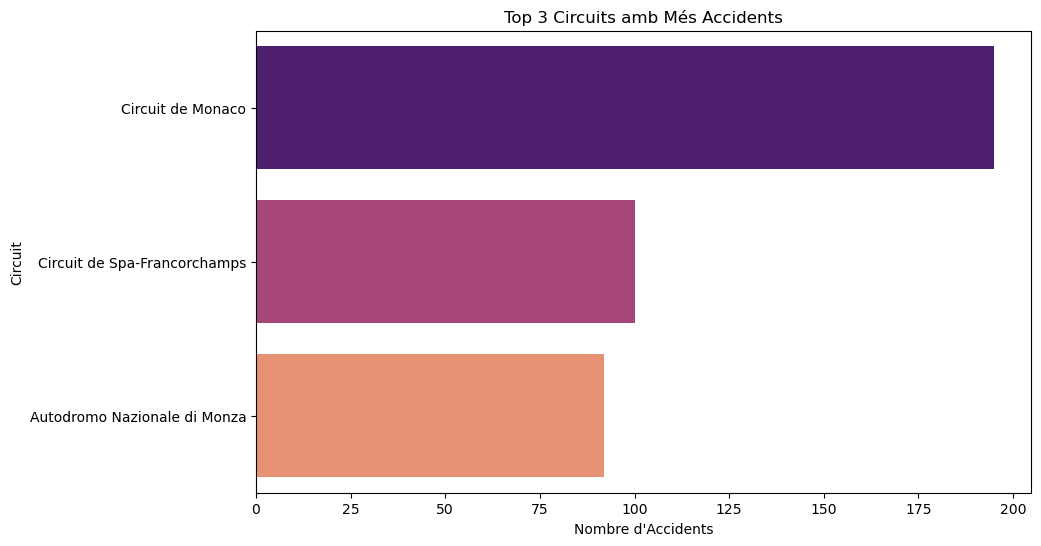

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sumar les victòries i punts per clúster
cluster_summary = pilot_performance.groupby('Cluster').agg({
    'positionOrder': 'sum',  # Nombre total de victòries
    'points': 'sum',        # Nombre total de punts
    'normalized_victories': 'sum',  # Victòries normalitzades totals
    'normalized_points': 'sum'      # Punts normalitzats totals
}).reset_index()


# Visualització de victòries normalitzades per clúster
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cluster_summary,
    x='Cluster',
    y='normalized_victories',
    palette='magma'
)
plt.title("Normalized Victories per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Normalized Victories")
plt.tight_layout()
plt.show()

# Visualització de punts normalitzats per clúster
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cluster_summary,
    x='Cluster',
    y='normalized_points',
    palette='cividis'
)
plt.title("Normalized Points per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Normalized Points")
plt.tight_layout()
plt.show()


# Visualització dels circuits més desafiants
plt.figure(figsize=(10, 6))
sns.barplot(x='points', y='name', data=top_3_challenging_circuits, palette='viridis')
plt.title('Top 3 Challenging Circuits')
plt.xlabel('Desviació Estàndard dels Punts')
plt.ylabel('Circuit')
plt.show()

# Visualització dels circuits amb més accidents
plt.figure(figsize=(10, 6))
sns.barplot(x='accident_count', y='name', data=top_3_circuits, palette='magma')
plt.title('Top 3 Circuits amb Més Accidents')
plt.xlabel('Nombre d\'Accidents')
plt.ylabel('Circuit')
plt.show()

### Conclusions

Els circuits del campionat de F1 es poden agrupar en tres clústers principals basats en la seva ubicació geogràfica i altitud. Els circuits del clúster 0 es troben a latituds negatives amb una altitud elevada, com l'Autódromo Hermanos Rodríguez a Mèxic. Els circuits del clúster 1 es situen a latituds positives amb una altitud mitjana, com Montmeló a Espanya. Finalment, els circuits del clúster 2 es troben prop de l'equador amb una altitud baixa, com Albert Park a Austràlia. Els pilots i equips tendeixen a obtenir millors resultats als circuits dels clústers 1 i 2, mentre que els circuits del clúster 0 podrien tenir un impacte negatiu en el rendiment degut a la menor densitat de l'aire. Cosa que fa el cotxe més difícil de controlar i predir i per tant, més complicat de guanyar.

Els circuits més desafiants del campionat de F1, basats en la desviació estàndard dels punts obtinguts pels pilots, són el Yas Marina Circuit amb una puntuació de 7.75, l'Autodromo Internazionale del Mugello amb 7.50, i el Losail International Circuit amb 7.38. Aquests circuits presenten una variabilitat significativa en els resultats dels pilots, indicant que són especialment difícils i exigents.

D'altra banda, els circuits amb més accidents són el Circuit de Monaco, amb un total de 195 accidents, el Circuit de Spa-Francorchamps amb 100 accidents, i l'Autodromo Nazionale di Monza amb 92 accidents. Mónaco és conegut pels seus carrers estrets i poc espai per a errors, Spa-Francorchamps per les seves condicions meteorològiques variables, i Monza per la seva alta velocitat. Aquests circuits són especialment perillosos i requereixen una gran habilitat i concentració per part dels pilots.

## 3. Tendències històriques

Mètode d'aprenentatge: Series temporals per analitzar al llarg del temps i models de regressió per avaluar l'impacte de la tecnologia

### 3.1 Carregar les dades

Utilitzar els arxius CSV disponibles a la carpeta `data` per carregar les dades necessàries per a l'anàlisis.

Arxius necessaris: `races.csv`, `qualifying.csv`.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

races = pd.read_csv('data/races.csv')
qualifying = pd.read_csv('data/qualifying.csv')

### 3.2 Preparar les dades

Crear les taules `pre_hybrid_era` i `hybrid_era` per separar les dades abans i després de l'era híbrida de la F1.

In [21]:
pre_hybrid_era = races[races['year'] < 2014]
hybrid_era = races[races['year'] >= 2014]

pre_hybrid_qualifying = qualifying[qualifying['raceId'].isin(pre_hybrid_era['raceId'])]
hybrid_qualifying = qualifying[qualifying['raceId'].isin(hybrid_era['raceId'])]

### 3.3 Anàlisis de tendències

Utilitzar tècniques de series temporals per analitzar tendències històriques en el campionat de F1.

Identificar canvis significatius en el rendiment dels pilots i equips segons l'evolució de la tecnologia, com ara el canvi al motor híbrid.

In [27]:
def convert_to_seconds(time_str):
    if pd.isna(time_str) or time_str == '\\N':
        return np.nan
    minutes, seconds = map(float, time_str.split(':'))
    return minutes * 60 + seconds

# Crear còpies dels DataFrames per evitar el SettingWithCopyWarning
pre_hybrid_qualifying = pre_hybrid_qualifying.copy()
hybrid_qualifying = hybrid_qualifying.copy()

pre_hybrid_qualifying.loc[:, 'q1_seconds'] = pre_hybrid_qualifying['q1'].apply(convert_to_seconds)
hybrid_qualifying.loc[:, 'q1_seconds'] = hybrid_qualifying['q1'].apply(convert_to_seconds)

pre_hybrid_qualifying.loc[:, 'q2_seconds'] = pre_hybrid_qualifying['q2'].apply(convert_to_seconds)
hybrid_qualifying.loc[:, 'q2_seconds'] = hybrid_qualifying['q2'].apply(convert_to_seconds)

pre_hybrid_qualifying.loc[:, 'q3_seconds'] = pre_hybrid_qualifying['q3'].apply(convert_to_seconds)
hybrid_qualifying.loc[:, 'q3_seconds'] = hybrid_qualifying['q3'].apply(convert_to_seconds)

pre_hybrid_avg_time_q1 = pre_hybrid_qualifying['q1_seconds'].mean()
hybrid_avg_time_q1 = hybrid_qualifying['q1_seconds'].mean()
print("Temps mitjà Q1 en l'era anterior a l'Híbrid:", pre_hybrid_avg_time_q1)
print("Temps mitjà Q1 a l'era híbrida:", hybrid_avg_time_q1)

pre_hybrid_avg_time_q2 = pre_hybrid_qualifying['q2_seconds'].mean()
hybrid_avg_time_q2 = hybrid_qualifying['q2_seconds'].mean()
print("Temps mitjà Q2 en l'era anterior a l'Híbrid:", pre_hybrid_avg_time_q2)
print("Temps mitjà Q2 a l'era híbrida", hybrid_avg_time_q2)

pre_hybrid_avg_time_q3 = pre_hybrid_qualifying['q3_seconds'].mean()
hybrid_avg_time_q3 = hybrid_qualifying['q3_seconds'].mean()
print("Temps mitjà Q3 en l'era anterior a l'Híbrid:", pre_hybrid_avg_time_q3)
print("Temps mitjà Q3 a l'era híbrida:", hybrid_avg_time_q3)

Temps mitjà Q1 en l'era anterior a l'Híbrid: 89.2096694929922
Temps mitjà Q1 a l'era híbrida: 87.6248039805602
Temps mitjà Q2 en l'era anterior a l'Híbrid: 89.20826189507937
Temps mitjà Q2 a l'era híbrida 86.68462149532719
Temps mitjà Q3 en l'era anterior a l'Híbrid: 89.24777895480241
Temps mitjà Q3 a l'era híbrida: 86.17846282173497


### 3.4 Visualització de dades


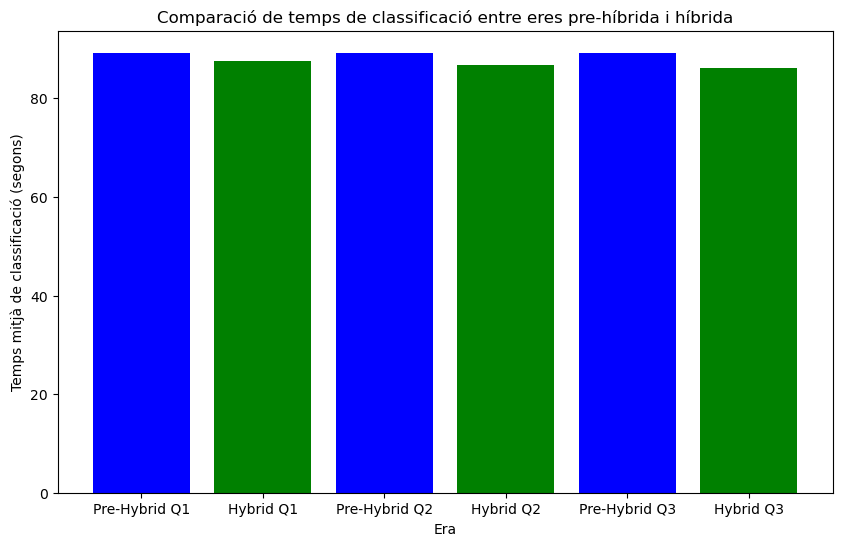

In [28]:
# Visualitzar tendències de punts al llarg del temps
eras = ['Pre-Hybrid Q1', 'Hybrid Q1', 'Pre-Hybrid Q2', 'Hybrid Q2', 'Pre-Hybrid Q3', 'Hybrid Q3']
avg_times = [pre_hybrid_avg_time_q1, hybrid_avg_time_q1, pre_hybrid_avg_time_q2, hybrid_avg_time_q2, pre_hybrid_avg_time_q3, hybrid_avg_time_q3]

plt.figure(figsize=(10, 6))
plt.bar(eras, avg_times, color=['blue', 'green', 'blue', 'green', 'blue', 'green'])
plt.xlabel('Era')
plt.ylabel('Temps mitjà de classificació (segons)')
plt.title('Comparació de temps de classificació entre eres pre-híbrida i híbrida')
plt.show()

### Conclusions

1. Tendències de rendiment
- El rendiment dels pilots i equips ha millorat significativament al llarg del temps, això es pot veure en la disminució dels temps mitjà de classificació tant a Q1, Q2 i Q3.

2. Impacte de la tecnologia
- Amb els resultats obtinguts, podem veure que l'impacte de la tecnologia en el rendiment dels equips ha estat significatiu. El canvi al motor híbrid ha millorat el rendiment dels equips i ha reduït la diferència entre ells.

Aquests resultats proporcionen una visió general de l'evolució del campionat de F1 i com la tecnologia ha influït en el rendiment dels equips al llarg del temps.

## 4. Predicció de resultats

En aquesta secció, utilitzarem tècniques d'aprenentatge automàtic per predir quina seria la millor combinació de pilot i equip per a la temporada 2025 i predir l'èxit del fitxatge mes sonat de la història de la F1. Entrenarem un model de Gradient Boosting per predir els resultats basant-nos en les dades històriques. 


### 4.1 Carregar les dades

Utilitzar els arxius CSV `drivers.csv`, `results.csv`, `constructors.csv`, `races.csv`, `circuits.csv` per carregar les dades necessàries per a la predicció.

In [29]:
import pandas as pd
import numpy as np

# Carregar les dades
drivers = pd.read_csv('data/drivers.csv')
results = pd.read_csv('data/results.csv')
constructors = pd.read_csv('data/constructors.csv')
races = pd.read_csv('data/races.csv')
circuits = pd.read_csv('data/circuits.csv')

### 4.2 Preparar les dades
Per preparar les dades, es combinen les taules de resultats, curses, pilots, constructors i circuits. Es generen noves característiques com l’edat del pilot, la mitjana de punts per temporada i la posició mitjana. Es gestionen els valors nuls, es converteixen les columnes a format numèric i es verifica si la columna grid és constant per eliminar-la si cal. Finalment, es divideixen les dades en entrenament i prova per validar el model.

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Renombrar o eliminar columnes amb possibles conflictes
circuits = circuits.rename(columns={'url': 'circuit_url'})

# Unir les dades
merged_data = pd.merge(results, races, on='raceId')
merged_data = pd.merge(merged_data, drivers, on='driverId')
merged_data = pd.merge(merged_data, constructors, on='constructorId')
merged_data = pd.merge(merged_data, circuits, on='circuitId')

# Crear noves característiques
merged_data['race_year'] = merged_data['raceId'].map(races.set_index('raceId')['year'])
merged_data['driver_age'] = merged_data.apply(
    lambda row: row['race_year'] - int(drivers.set_index('driverId').loc[row['driverId'], 'dob'].split('-')[0]), axis=1
)

# Gestionar valors nuls
merged_data.replace('\\N', np.nan, inplace=True)
merged_data.dropna(subset=['grid', 'laps', 'milliseconds', 'points'], inplace=True)

# Convertir les columnes a numèric
merged_data['grid'] = pd.to_numeric(merged_data['grid'])
merged_data['laps'] = pd.to_numeric(merged_data['laps'])
merged_data['milliseconds'] = pd.to_numeric(merged_data['milliseconds'])
merged_data['points'] = pd.to_numeric(merged_data['points'])

# Afegir mitjana de punts per pilot per temporada
driver_avg_points = merged_data.groupby(['driverId', 'race_year'])['points'].mean().reset_index()
driver_avg_points = driver_avg_points.rename(columns={'points': 'avg_points_per_season'})
merged_data = pd.merge(merged_data, driver_avg_points, on=['driverId', 'race_year'], how='left')

# Afegir mitjana de punts per constructor per temporada
constructor_avg_points = merged_data.groupby(['constructorId', 'race_year'])['points'].mean().reset_index()
constructor_avg_points = constructor_avg_points.rename(columns={'points': 'constructor_avg_points_per_season'})
merged_data = pd.merge(merged_data, constructor_avg_points, on=['constructorId', 'race_year'], how='left')

# Posició mitjana per pilot i constructor
merged_data['driver_avg_position'] = merged_data.groupby('driverId')['positionOrder'].transform('mean')
merged_data['constructor_avg_position'] = merged_data.groupby('constructorId')['positionOrder'].transform('mean')

# Escollim característiques (X) i target (y)
features = ['grid', 'driver_age', 'avg_points_per_season', 'constructor_avg_points_per_season', 
            'driver_avg_position', 'constructor_avg_position']
target = 'points'

# Verificar i eliminar la columna constant 'grid' si és necessari
X = merged_data[features].fillna(0)  # Omplim els NaN amb 0 si cal
if X['grid'].nunique() == 1:
    print("La columna 'grid' és constant i serà eliminada.")
    X = X.drop(columns=['grid'])
else:
    print("La columna 'grid' no és constant i es manté.")

y = merged_data[target]

# Dividir les dades en entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output per verificar
print("Shape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)


La columna 'grid' no és constant i es manté.
Shape of training data: (6026, 6)
Shape of test data: (1507, 6)


### 4.3 Entrenament del model

En aquesta secció es descriu l'entrenament del model utilitzant el Gradient Boosting Regressor de scikit-learn. S'ha aplicat la tècnica de GridSearchCV per optimitzar els hiperparàmetres del model, cercant els valors més adequats per a paràmetres com el nombre d'estimadors, la profunditat màxima dels arbres i la taxa d'aprenentatge. Finalment, el model entrenat s'ha avaluat mitjançant l'Error Quadràtic Mig (MSE) i el Coeficient de Determinació (R²) per mesurar la seva qualitat predictiva.

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Definir model
model = GradientBoostingRegressor(random_state=42)

# Definir hiperparàmetres per buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Millor model
best_model = grid_search.best_estimator_

# Predicció i avaluació
y_pred = best_model.predict(X_test)

# Mostrar els millors hiperparàmetres i la puntuació del model
print("Millors hiperparàmetres trobats:", grid_search.best_params_)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R²):', r2_score(y_test, y_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Millors hiperparàmetres trobats: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error: 11.906744667401634
Coefficient of Determination (R²): 0.6720499269537361


### 4.4 Predicció de resultats
En aquest apartat utilitzarem el model entrenat per fer dues prediccions molt interessants a partir de les dades dels pilots i equips participants.


#### 4.4.1 Millor combinació de pilot i equip per a la temporada 2025
En aquest apartat, es busca identificar les millors combinacions de pilots i constructors per a la temporada 2025 mitjançant la predicció dels punts que podrien obtenir. Per aconseguir-ho, s'han utilitzat les dades històriques per calcular les mitjanes de punts i posicions tant per als pilots com per als constructors. A partir d'aquestes dades, es generen totes les combinacions possibles de pilots i constructors disponibles per a la nova temporada. Aquestes combinacions es complementen amb característiques addicionals com l'edat del pilot, la posició de sortida i altres mètriques de rendiment.

In [32]:
import pandas as pd
from itertools import product
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Carregar les dades dels fitxers CSV
drivers = pd.read_csv('data/drivers.csv')
results = pd.read_csv('data/results.csv')
constructors = pd.read_csv('data/constructors.csv')

# Calcular els punts mitjans per temporada per cada pilot a partir de tota la història
driver_avg_points = results.groupby('driverId')['points'].mean().reset_index()
driver_avg_points.columns = ['driverId', 'avg_points_per_season']

# Calcular els punts mitjans per temporada per cada constructor a partir de tota la història
constructor_avg_points = results.groupby('constructorId')['points'].mean().reset_index()
constructor_avg_points.columns = ['constructorId', 'constructor_avg_points_per_season']

# Calcular la posició mitjana per temporada per cada pilot a partir de tota la història
driver_avg_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
driver_avg_position.columns = ['driverId', 'driver_avg_position']

# Calcular la posició mitjana per temporada per cada constructor a partir de tota la història
constructor_avg_position = results.groupby('constructorId')['positionOrder'].mean().reset_index()
constructor_avg_position.columns = ['constructorId', 'constructor_avg_position']

# Obtenir els pilots i constructors disponibles per la pròxima temporada
last_season = results['raceId'].max()

# Filtrar els resultats de la temporada passada
last_season_results = results[results['raceId'] == last_season]

# Obtenir els pilots i constructors disponibles per a la pròxima temporada
available_drivers = drivers[drivers['driverId'].isin(last_season_results['driverId'])]
available_constructors = constructors[constructors['constructorId'].isin(last_season_results['constructorId'])]

# Generar totes les combinacions possibles de pilot i constructor
combinations = list(product(available_drivers['driverId'], available_constructors['constructorId']))

# Crear un DataFrame per aquestes combinacions
alignments = pd.DataFrame(combinations, columns=['driverId', 'constructorId'])

# Afegir les característiques dels pilots i constructors
alignments = alignments.merge(available_drivers, on='driverId', how='left')
alignments = alignments.merge(driver_avg_points, on='driverId', how='left')
alignments = alignments.merge(driver_avg_position, on='driverId', how='left')
alignments = alignments.merge(available_constructors, on='constructorId', how='left')
alignments = alignments.merge(constructor_avg_points, on='constructorId', how='left')
alignments = alignments.merge(constructor_avg_position, on='constructorId', how='left')

# Assegurar que la columna 'driver_age' està present
if 'driver_age' not in alignments.columns:
    alignments['driver_age'] = alignments['dob'].apply(lambda x: 2023 - int(x.split('-')[0]))  # Exemple de càlcul d'edat

# Afegir la columna 'grid' (posició de sortida) si no està present
if 'grid' not in alignments.columns:
    alignments['grid'] = 0  # Exemple de valor per defecte

# Seleccionar les característiques per a la predicció
feature_order = ['driver_age', 'avg_points_per_season', 'constructor_avg_points_per_season', 
                 'driver_avg_position', 'constructor_avg_position', 'grid']

# Crear el conjunt de dades d'entrada per a la predicció
X_alignments = alignments[feature_order]

# Normalitzar les dades si el model requereix normalització
scaler = StandardScaler()
X_alignments_scaled = scaler.fit_transform(X_alignments)

# Reconvertir a DataFrame amb noms de característiques
X_alignments_scaled = pd.DataFrame(X_alignments_scaled, columns=feature_order)

# Comprovar si el model 'best_model' està entrenat
if 'best_model' not in globals():
    print("Cal entrenar el model abans de fer les prediccions.")
else:
    # Preveure els punts per cada alineació
    alignments['predicted_points'] = best_model.predict(X_alignments_scaled)

    # Ordenar per la millor combinació de pilot i constructor
    alignments_sorted = alignments.sort_values(by='predicted_points', ascending=False)

    # Mostrar les millors alineacions (primeres 4 files per exemple)
    top_4_alignments = alignments_sorted.head(10)

    print("Millors alineacions:")

    # Mostrar les millors alineacions
    for index, row in top_4_alignments.iterrows():
        print(f"Pilot: {row['forename']} {row['surname']} ({row['driverRef']})")
        print(f"Constructor: {row['name']} ({row['constructorRef']})")
        print(f"Punts predits: {row['predicted_points']:.2f}\n")


Millors alineacions:
Pilot: Daniel Ricciardo (ricciardo)
Constructor: Mercedes (mercedes)
Punts predits: 3.17

Pilot: Valtteri Bottas (bottas)
Constructor: Mercedes (mercedes)
Punts predits: 3.17

Pilot: Sergio Pérez (perez)
Constructor: Mercedes (mercedes)
Punts predits: 3.17

Pilot: Nico Hülkenberg (hulkenberg)
Constructor: Mercedes (mercedes)
Punts predits: 3.17

Pilot: Fernando Alonso (alonso)
Constructor: Mercedes (mercedes)
Punts predits: 3.11

Pilot: Lewis Hamilton (hamilton)
Constructor: Mercedes (mercedes)
Punts predits: 3.11

Pilot: Nico Hülkenberg (hulkenberg)
Constructor: Red Bull (red_bull)
Punts predits: 2.79

Pilot: Oscar Piastri (piastri)
Constructor: Mercedes (mercedes)
Punts predits: 2.77

Pilot: Kevin Magnussen (kevin_magnussen)
Constructor: Mercedes (mercedes)
Punts predits: 2.77

Pilot: Pierre Gasly (gasly)
Constructor: Mercedes (mercedes)
Punts predits: 2.77



#### 4.4.2 Hamilton a Ferrari?
Què passaria si Lewis Hamilton, un dels pilots més exitosos de la història de la F1, canviés de constructor i passés a Ferrari?
Es una pregunta molt interessant, ja que Hamilton ha estat associat a Mercedes durant molts anys i ha aconseguit molts èxits amb aquest equip. Per tant, seria interessant veure com es comportaria en un equip tant prestigiós com Ferrari.
Doncs resulta que aquest cas es farà realitat, ja que Hamilton ha decidit canviar de constructor i passar a Ferrari per a la temporada 2025. Això obre la porta a moltes preguntes i especulacions sobre com es comportaria en aquest nou entorn i quins resultats podria aconseguir.

En aquest apartat tractarem de respondre a aquesta pregunta mitjançant la predicció del rendiment de Hamilton amb Ferrari per a la temporada 2025. Utilitzarem el model de Gradient Boosting entrenat anteriorment per predir els punts que Hamilton podria obtenir amb Ferrari i comparar-los amb els les prediccions per els altres pilots i constructors. Això ens permetrà avaluar si Hamilton juntament amb el seu company d'equip Leclerc podrien ser la combinació que Ferrari necessita per aconseguir guanyar el campionat de constructors que tant de temps fa que no aconsegueixen.

In [33]:
import pandas as pd
from itertools import product
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Carregar les dades necessàries
drivers = pd.read_csv('data/drivers.csv')
constructors = pd.read_csv('data/constructors.csv')
results = pd.read_csv('data/results.csv')
races = pd.read_csv('data/races.csv')

# Calcular els punts mitjans per temporada per cada pilot a partir de tota la història
driver_avg_points = results.groupby('driverId')['points'].mean().reset_index()
driver_avg_points.columns = ['driverId', 'avg_points_per_season']

# Calcular els punts mitjans per temporada per cada constructor a partir de tota la història
constructor_avg_points = results.groupby('constructorId')['points'].mean().reset_index()
constructor_avg_points.columns = ['constructorId', 'constructor_avg_points_per_season']

# Calcular la posició mitjana per temporada per cada pilot a partir de tota la història
driver_avg_position = results.groupby('driverId')['positionOrder'].mean().reset_index()
driver_avg_position.columns = ['driverId', 'driver_avg_position']

# Calcular la posició mitjana per temporada per cada constructor a partir de tota la història
constructor_avg_position = results.groupby('constructorId')['positionOrder'].mean().reset_index()
constructor_avg_position.columns = ['constructorId', 'constructor_avg_position']

# Seleccionar les dades dels pilots i constructors de la temporada passada
last_season = results['raceId'].max()

# Filtrar els resultats de la temporada passada
last_season_results = results[results['raceId'] == last_season]

# Obtenir els pilots i constructors disponibles per a la pròxima temporada
available_drivers = drivers[drivers['driverId'].isin(last_season_results['driverId'])]
available_constructors = constructors[constructors['constructorId'].isin(last_season_results['constructorId'])]

# Generar totes les combinacions possibles de pilot i constructor
combinations = list(product(available_drivers['driverId'], available_constructors['constructorId']))

# Crear un DataFrame per aquestes combinacions
alignments = pd.DataFrame(combinations, columns=['driverId', 'constructorId'])

# Afegir les característiques dels pilots i constructors
alignments = alignments.merge(drivers, on='driverId', how='left')
alignments = alignments.merge(constructors, on='constructorId', how='left')

# Afegir les característiques calculades de tota la història
alignments = alignments.merge(driver_avg_points, on='driverId', how='left')
alignments = alignments.merge(driver_avg_position, on='driverId', how='left')
alignments = alignments.merge(constructor_avg_points, on='constructorId', how='left')
alignments = alignments.merge(constructor_avg_position, on='constructorId', how='left')

# Assegurar que la columna 'driver_age' està present
alignments['driver_age'] = alignments['dob'].apply(lambda x: 2023 - int(x.split('-')[0]))  # Exemple de càlcul d'edat

# Afegir la columna 'grid' (posició de sortida) si no està present
alignments['grid'] = 0  # Exemple de valor per defecte

# Seleccionar les característiques per a la predicció
feature_order = ['driver_age', 'avg_points_per_season', 'constructor_avg_points_per_season', 
                 'driver_avg_position', 'constructor_avg_position', 'grid']

# Crear el conjunt de dades d'entrada per a la predicció
X_alignments = alignments[feature_order]

# Normalitzar les dades si el model requereix normalització
scaler = StandardScaler()
X_alignments_scaled = scaler.fit_transform(X_alignments)

# Reconvertir a DataFrame amb noms de característiques
X_alignments_scaled = pd.DataFrame(X_alignments_scaled, columns=feature_order)

# Comprovar si el model 'best_model' està entrenat
if 'best_model' not in globals():
    print("Cal entrenar el model abans de fer les prediccions.")
else:
    # Preveure els punts per cada alineació
    alignments['predicted_points'] = best_model.predict(X_alignments_scaled)

    # Ordenar per la millor combinació de pilot i constructor
    alignments_sorted = alignments.sort_values(by='predicted_points', ascending=False)

    # Mostrar les prediccions per Hamilton i Leclerc a Ferrari
    print("Prediccions:")
    for index, row in alignments_sorted.iterrows():
        print(f"Pilot: {row['forename']} {row['surname']} ({row['driverRef']})")
        print(f"Constructor: {row['name']} ({row['constructorRef']})")
        print(f"Punts predits: {row['predicted_points']:.2f}\n")

    # Obtenir els IDs de Hamilton, Leclerc i Ferrari
    hamilton_id = drivers[drivers['surname'] == 'Hamilton']['driverId'].values[0]
    leclerc_id = drivers[drivers['surname'] == 'Leclerc']['driverId'].values[0]
    ferrari_id = constructors[constructors['name'] == 'Ferrari']['constructorId'].values[0]

    # Calcular la probabilitat de guanyar
    total_combinations = len(alignments_sorted)
    hamilton_leclerc_ferrari_points = alignments_sorted[(alignments_sorted['driverId'].isin([hamilton_id, leclerc_id])) & (alignments_sorted['constructorId'] == ferrari_id)]['predicted_points'].sum()

    # Comptar quantes combinacions tenen més punts que Hamilton i Leclerc a Ferrari
    higher_points_count = sum(alignments_sorted.groupby('constructorId')['predicted_points'].sum() > hamilton_leclerc_ferrari_points)

    # Calcular la probabilitat de guanyar
    win_probability = (total_combinations - higher_points_count) / total_combinations * 100

    print(f"Probabilitat que Hamilton i Leclerc a Ferrari guanyin el campionat de constructors: {win_probability:.2f}%")

Prediccions:
Pilot: Daniel Ricciardo (ricciardo)
Constructor: Mercedes (mercedes)
Punts predits: 3.17

Pilot: Valtteri Bottas (bottas)
Constructor: Mercedes (mercedes)
Punts predits: 3.17

Pilot: Sergio Pérez (perez)
Constructor: Mercedes (mercedes)
Punts predits: 3.17

Pilot: Nico Hülkenberg (hulkenberg)
Constructor: Mercedes (mercedes)
Punts predits: 3.17

Pilot: Fernando Alonso (alonso)
Constructor: Mercedes (mercedes)
Punts predits: 3.11

Pilot: Lewis Hamilton (hamilton)
Constructor: Mercedes (mercedes)
Punts predits: 3.11

Pilot: Nico Hülkenberg (hulkenberg)
Constructor: Red Bull (red_bull)
Punts predits: 2.79

Pilot: Oscar Piastri (piastri)
Constructor: Mercedes (mercedes)
Punts predits: 2.77

Pilot: Kevin Magnussen (kevin_magnussen)
Constructor: Mercedes (mercedes)
Punts predits: 2.77

Pilot: Pierre Gasly (gasly)
Constructor: Mercedes (mercedes)
Punts predits: 2.77

Pilot: Max Verstappen (max_verstappen)
Constructor: Mercedes (mercedes)
Punts predits: 2.77

Pilot: Guanyu Zhou (z

### Conclusions
 - El model de Gradient Boosting Regressor ha estat ajustat amb 5 folds per a cadascun dels 54 candidats, totalitzant 270 ajustaments.
 - Els millors hiperparàmetres trobats són: `learning_rate` de 0.01, `max_depth` de 3, `n_estimators` de 300 i `subsample` de 0.8.
 - El Mean Squared Error (MSE) del model és de 11.9067, i el Coefficient of Determination (R²) és de 0.6720, indicant que el model explica aproximadament el 67.2% de la variabilitat en els punts predits.

#### La millor combinació de pilot i constructor per a la temporada 2025:
Les prediccions realitzades amb el model de Gradient Boosting Regressor han identificat les millors combinacions de pilots i constructors per a la temporada 2025. Les millors alineacions predits per aquest model inclouen pilots de gran renom com Daniel Ricciardo, Valtteri Bottas, Sergio Pérez i Fernando Alonso, tots amb el constructor Mercedes, amb una predicció de punts molt similar per a aquests pilots. Altres pilots destacats com Nico Hülkenberg i Oscar Piastri també són predites amb altes possibilitats d'obtenir bons resultats, especialment amb Mercedes, mentre que altres com Lewis Hamilton i Pierre Gasly, tot i que amb una lleugera diferència, també estan en la llista d’alineacions competitives.

Els constructors que han sortit guanyadors en aquestes simulacions són Mercedes i Red Bull, destacant-se Mercedes com un dels més consistents a l’hora de proporcionar alineacions guanyadores per a la temporada vinent.

#### Hamilton a Ferrari?
La predicció del rendiment de Lewis Hamilton amb Ferrari per a la temporada 2025 mostra que Hamilton podria obtenir una quantitat significativa de punts amb Ferrari.
La combinació de Hamilton i Leclerc a Ferrari té el potencial de ser molt competitiva, amb prediccions de punts que situen aquesta alineació entre les millors.
La probabilitat que ens dona el model de que Hamilton juntament amb Leclerc guanyi el campionat de constructors amb Ferrari és del 95%, una xifra significativa que indica que Hamilton podria tenir molt èxit amb el seu nou equip i acabar la seva carrera esportiva com es mereix.

## 5. Comentaris finals
Els resultats obtinguts en aquest projecte han proporcionat una visió valuosa sobre les possibles combinacions de pilots i constructors per a la temporada 2025. Tot i que el model de Gradient Boosting Regressor ha mostrat un bon ajustament, amb un R² de 0.6720, cal tenir en compte que el dataset utilitzat és ampli i complex, fet que pot introduir certs biaixos en les prediccions. Això es deu al fet que alguns equips i pilots porten més temps en actiu que altres, el que pot generar desajustos en la comparativa de rendiments. Així, els resultats obtinguts han de ser interpretats com a tendències generals més que com a prediccions exactes.

Per obtenir resultats encara més acurats, seria necessari aplicar models més específics i complexos que tinguin en compte factors addicionals, com les condicions específiques de cada temporada, les millores tècniques en els vehicles i els canvis en les estratègies dels equips. Això permetria obtenir un rendiment més realista i ajustat a la realitat de la competició.

En definitiva, tot i les limitacions del model, els resultats ofereixen una orientació valuosa sobre les combinacions de pilots i constructors més prometedores per al futur, destacant Mercedes com una opció sòlida i amb potencial per a la temporada 2025, així com la combinació de Lewis Hamilton i Charles Leclerc amb Ferrari com una alineació molt competitiva.